## Loan Case Study 

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data file
loan_df = pd.read_csv('loan.csv')

In [3]:
#check the shape of the dataframe
loan_df.shape

(39717, 111)

In [4]:
# first few records
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Confirm that ID is unique over the entire dataframe
loan_df.id.duplicated().sum()

0

In [6]:
# numerical attributes described
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
# check missing values
missing = 100 * (loan_df.isnull().sum()/loan_df.shape[0])
missing[missing > 0].sort_values(ascending = False)[:10]

total_il_high_credit_limit    100.0
mo_sin_old_rev_tl_op          100.0
bc_util                       100.0
bc_open_to_buy                100.0
total_bc_limit                100.0
acc_open_past_24mths          100.0
inq_last_12m                  100.0
total_cu_tl                   100.0
inq_fi                        100.0
total_rev_hi_lim              100.0
dtype: float64

In [8]:
loan_df['total_il_high_credit_limit'].isnull().all()

True

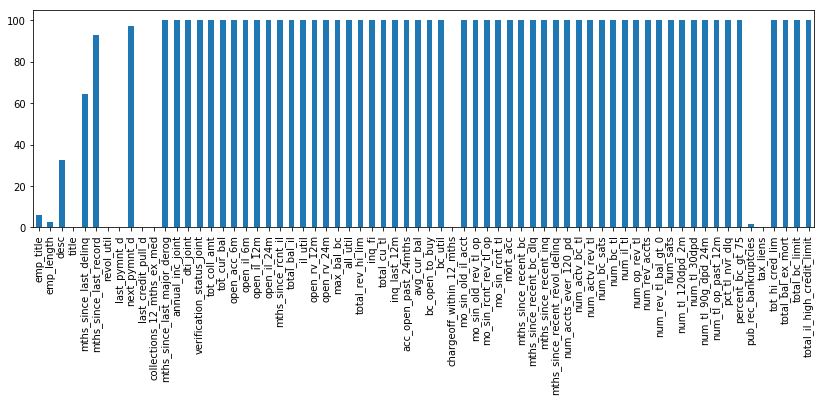

In [9]:
missing[missing > 0].plot(kind='bar',figsize=(14,4))
plt.show()

In [10]:
# drop columns with no data at all (all missing)
missing_cols = missing[missing == 100].index.tolist()
loan_df.drop(columns=missing_cols,axis=1,inplace=True)

In [11]:
# check missing values again
missing = 100 * (loan_df.isnull().sum()/loan_df.shape[0])
missing[missing > 0].sort_values(ascending = False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

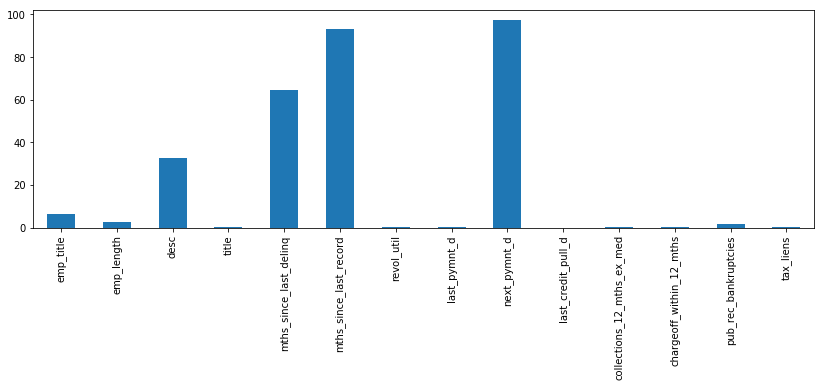

In [12]:
# barplot for missing columns
missing[missing > 0].plot(kind='bar',figsize=(14,4))
plt.show()

In [13]:
#next_pymnt_d and mths_since_last_record are having more than 90% missing values, so we drop them
loan_df.drop(columns=['next_pymnt_d','mths_since_last_record'],axis=1,inplace=True)

In [14]:
# check missing values again
missing = 100 * (loan_df.isnull().sum()/loan_df.shape[0])
missing[missing > 0].sort_values(ascending = False)

mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

In [15]:
pd.set_option('display.max_columns', 55)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [16]:
# emp_title,url and desc dont seem much useful, hence we drop these columns
loan_df.drop(columns=['url','desc','emp_title'],axis=1,inplace=True)

In [17]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [18]:
# cleaning
loan_df["term"]= loan_df["term"].str.replace("months", "")
loan_df["int_rate"]= loan_df["int_rate"].str.replace("%", "")

In [19]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
# check emp_length values
loan_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [21]:
# cleaning
loan_df["emp_length"]= loan_df["emp_length"].str.replace("10+ years", "10")
loan_df["emp_length"]= loan_df["emp_length"].str.replace("< 1 year", "0")
loan_df["emp_length"]= loan_df["emp_length"].str.replace("years", "")
loan_df["emp_length"]= loan_df["emp_length"].str.replace("year", "")
loan_df["emp_length"]= loan_df["emp_length"].str.replace("+", "")

In [22]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [23]:
# fill missing values : The below columns can be filled with ZERO in place of NaN
loan_df['mths_since_last_delinq'] = loan_df['mths_since_last_delinq'].fillna(0)
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(0)
loan_df['chargeoff_within_12_mths'] = loan_df['chargeoff_within_12_mths'].fillna(0)
loan_df['collections_12_mths_ex_med'] = loan_df['collections_12_mths_ex_med'].fillna(0)
loan_df['tax_liens'] = loan_df['tax_liens'].fillna(0)

In [24]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [25]:
# check missing values again
missing = 100 * (loan_df.isnull().sum()/loan_df.shape[0])
missing[missing > 0].sort_values(ascending = False)

emp_length            2.706650
last_pymnt_d          0.178765
revol_util            0.125891
title                 0.027696
last_credit_pull_d    0.005036
dtype: float64

In [26]:
loan_df.emp_length.value_counts()

10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
Name: emp_length, dtype: int64

In [27]:
# use most common length to fill missing values
loan_df['emp_length'] =  loan_df['emp_length'].fillna(10)

In [28]:
# check missing values again
missing = 100 * (loan_df.isnull().sum()/loan_df.shape[0])
missing[missing > 0].sort_values(ascending = False)

last_pymnt_d          0.178765
revol_util            0.125891
title                 0.027696
last_credit_pull_d    0.005036
dtype: float64

In [29]:
loan_df['revol_util']=pd.to_numeric(loan_df['revol_util'].str.replace("%",""))

mean of revol_util 48.83215241888721
mode of revol_util 0    0.0
dtype: float64
median of revol_util 49.3


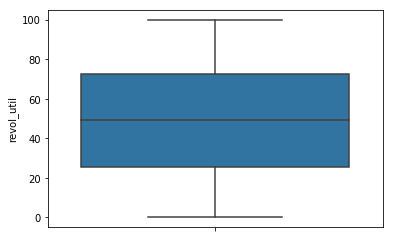

In [30]:
print('mean of revol_util',loan_df['revol_util'].mean())
print('mode of revol_util',loan_df['revol_util'].mode())
print('median of revol_util',loan_df['revol_util'].median())
sns.boxplot(y='revol_util',data=loan_df)
plt.show()

In [31]:
# fill missing values with mode
loan_df['revol_util']=loan_df['revol_util'].fillna(0)

In [32]:
# check missing values again
missing = 100 * (loan_df.isnull().sum()/loan_df.shape[0])
missing[missing > 0].sort_values(ascending = False)

last_pymnt_d          0.178765
title                 0.027696
last_credit_pull_d    0.005036
dtype: float64

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


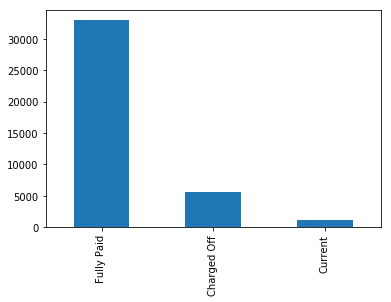

In [33]:
print(loan_df.loan_status.value_counts())
loan_df.loan_status.value_counts().plot(kind='bar')
plt.show()

In [34]:
# convert loan_status to two statuses
loan_df['loan_status'] =loan_df.loan_status.replace('Fully Paid','Normal')
loan_df['loan_status'] =loan_df.loan_status.replace('Current','Normal')

Normal         34090
Charged Off     5627
Name: loan_status, dtype: int64


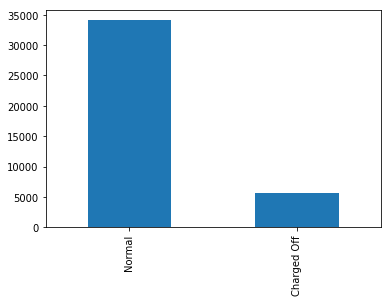

In [35]:
print(loan_df.loan_status.value_counts())
loan_df.loan_status.value_counts().plot(kind='bar')
plt.show()

In [36]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [37]:
loan_df['term'] = pd.to_numeric(loan_df['term'])
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'])
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'])

In [38]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Normal,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Normal,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Normal,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Normal,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


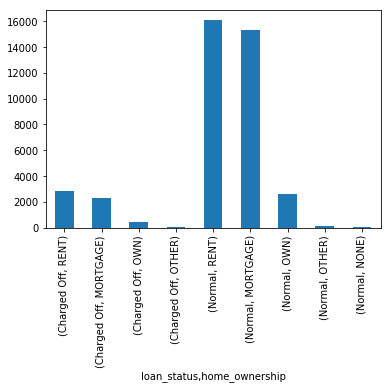

In [39]:
# home_ownership is not a useful feature as rent and mortgage are appearing in both normal and defaulter cases
loan_df.groupby('loan_status')['home_ownership'].value_counts().plot(kind='bar')
plt.show()

In [40]:
# loan amount
print('Mean loan amt',loan_df.groupby('loan_status')['loan_amnt'].mean())
print('*'*100)
print('median loan amt',loan_df.groupby('loan_status')['loan_amnt'].median())
print('*'*100)
print('max loan amt',loan_df.groupby('loan_status')['loan_amnt'].max())
print('*'*100)
print('min loan amt',loan_df.groupby('loan_status')['loan_amnt'].min())

Mean loan amt loan_status
Charged Off    12104.385108
Normal         11073.372690
Name: loan_amnt, dtype: float64
****************************************************************************************************
median loan amt loan_status
Charged Off    10000
Normal          9800
Name: loan_amnt, dtype: int64
****************************************************************************************************
max loan amt loan_status
Charged Off    35000
Normal         35000
Name: loan_amnt, dtype: int64
****************************************************************************************************
min loan amt loan_status
Charged Off    900
Normal         500
Name: loan_amnt, dtype: int64


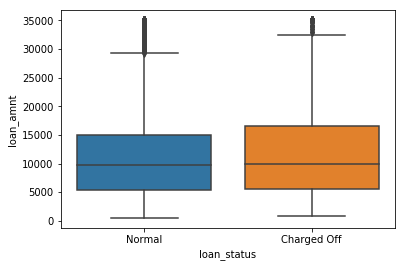

In [41]:
# loan amount variation is pretty close
sns.boxplot(x='loan_status',y='loan_amnt',data=loan_df)
plt.show()

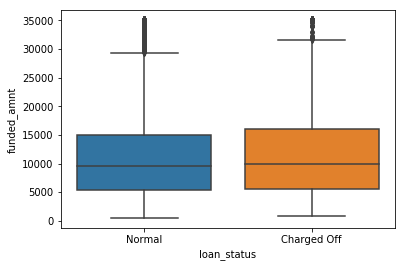

In [42]:
# funded amount variation is pretty close
sns.boxplot(x='loan_status',y='funded_amnt',data=loan_df)
plt.show()

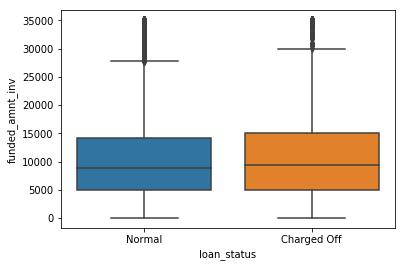

In [43]:
# funded amount inv variation is pretty close
sns.boxplot(x='loan_status',y='funded_amnt_inv',data=loan_df)
plt.show()

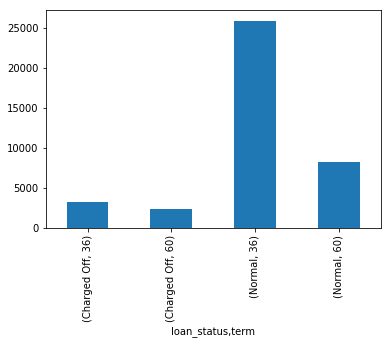

In [44]:
# term is not a useful feature as there are both status records for each term
loan_df.groupby('loan_status')['term'].value_counts().plot(kind='bar')
plt.show()

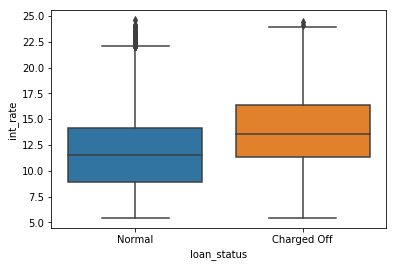

In [45]:
# int rate inv variation
sns.boxplot(x='loan_status',y='int_rate',data=loan_df)
plt.show()

In [46]:
# have a closer look @ int_rate
# For charged-off loans , the mean and median int rate is higher than normal status 
# so int_rate could e an important feature
print('Mean int rate',loan_df.groupby('loan_status')['int_rate'].mean())
print('*'*100)
print('median int rate',loan_df.groupby('loan_status')['int_rate'].median())
print('*'*100)
print('max int rate',loan_df.groupby('loan_status')['int_rate'].max())
print('*'*100)
print('min int rate',loan_df.groupby('loan_status')['int_rate'].min())

Mean int rate loan_status
Charged Off    13.820432
Normal         11.724186
Name: int_rate, dtype: float64
****************************************************************************************************
median int rate loan_status
Charged Off    13.61
Normal         11.49
Name: int_rate, dtype: float64
****************************************************************************************************
max int rate loan_status
Charged Off    24.40
Normal         24.59
Name: int_rate, dtype: float64
****************************************************************************************************
min int rate loan_status
Charged Off    5.42
Normal         5.42
Name: int_rate, dtype: float64


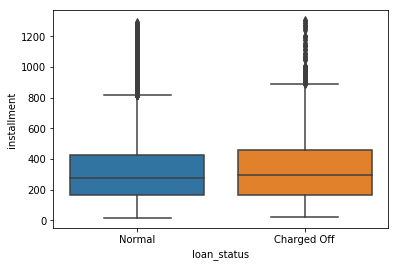

In [47]:
# installment variation  is close
sns.boxplot(x='loan_status',y='installment',data=loan_df)
plt.show()

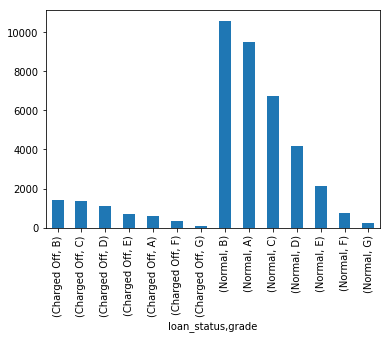

In [48]:
# grade is not a useful feature as there are all the grades for each status
loan_df.groupby('loan_status')['grade'].value_counts().plot(kind='bar')
plt.show()

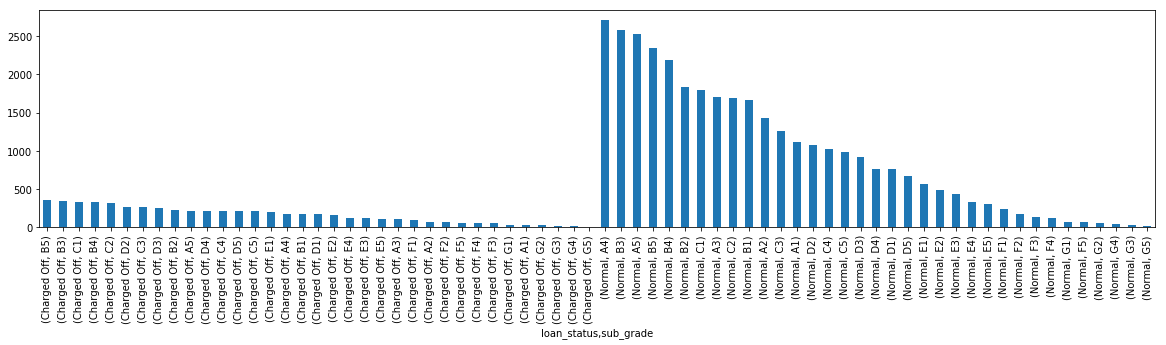

In [49]:
# sub grade is not a useful feature as there are all the grades for each status
loan_df.groupby('loan_status')['sub_grade'].value_counts().plot(kind='bar',figsize=(20,4))
plt.show()

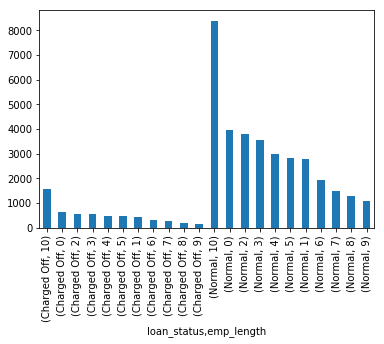

In [50]:
# emp_length is not a useful feature as there are all the lengths for each status
loan_df.groupby('loan_status')['emp_length'].value_counts().plot(kind='bar')
plt.show()

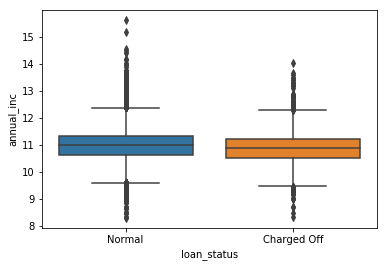

In [51]:
# annual income variation
sns.boxplot(x='loan_status',y=np.log(loan_df['annual_inc']),data=loan_df)
plt.show()

In [52]:
# have a closer look @ annual income
# For charged-off loans , the mean,max and median annual_inc are smaller than normal status annual_inc 
# so annual_inc could be an important feature
print('Mean income',loan_df.groupby('loan_status')['annual_inc'].mean())
print('*'*100)
print('median income',loan_df.groupby('loan_status')['annual_inc'].median())
print('*'*100)
print('max income',loan_df.groupby('loan_status')['annual_inc'].max())
print('*'*100)
print('min income',loan_df.groupby('loan_status')['annual_inc'].min())

Mean income loan_status
Charged Off    62427.298034
Normal         70048.707623
Name: annual_inc, dtype: float64
****************************************************************************************************
median income loan_status
Charged Off    53000.0
Normal         60000.0
Name: annual_inc, dtype: float64
****************************************************************************************************
max income loan_status
Charged Off    1250000.0
Normal         6000000.0
Name: annual_inc, dtype: float64
****************************************************************************************************
min income loan_status
Charged Off    4080.0
Normal         4000.0
Name: annual_inc, dtype: float64


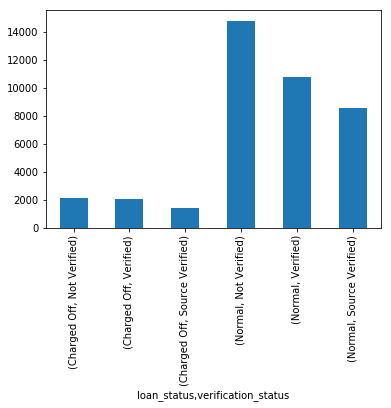

In [53]:
# verification status  is not a useful feature as there are all the verification states for each status
loan_df.groupby('loan_status')['verification_status'].value_counts().plot(kind='bar')
plt.show()

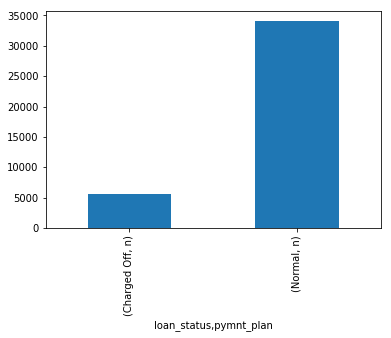

In [54]:
# payment plan  is not a useful feature as there are all the states for each status
loan_df.groupby('loan_status')['pymnt_plan'].value_counts().plot(kind='bar')
plt.show()

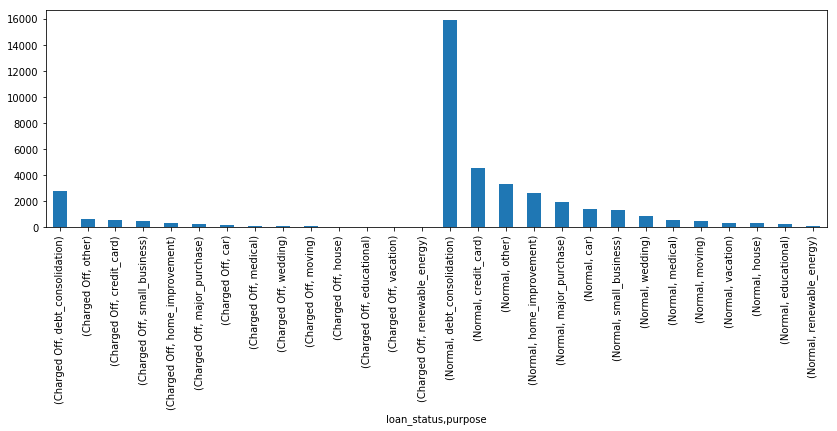

In [55]:
# purpose  is not a useful feature as there are all the values for each status
loan_df.groupby('loan_status')['purpose'].value_counts().plot(kind='bar',figsize=(14,4))
plt.show()

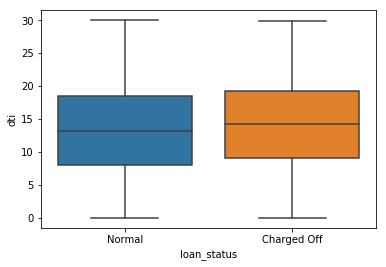

In [56]:
# dti variation  is pretty close
sns.boxplot(x='loan_status',y='dti',data=loan_df)
plt.show()

In [57]:
# have a closer look @ dti
# For charged-off loans , the mean,max and median dti are 1 point more than normal status annual_inc 
# so dti could be a marginally important feature
print('Mean dti',loan_df.groupby('loan_status')['dti'].mean())
print('*'*100)
print('median dti',loan_df.groupby('loan_status')['dti'].median())
print('*'*100)
print('max dti',loan_df.groupby('loan_status')['dti'].max())
print('*'*100)
print('min dti',loan_df.groupby('loan_status')['dti'].min())

Mean dti loan_status
Charged Off    14.000624
Normal         13.201980
Name: dti, dtype: float64
****************************************************************************************************
median dti loan_status
Charged Off    14.29
Normal         13.25
Name: dti, dtype: float64
****************************************************************************************************
max dti loan_status
Charged Off    29.85
Normal         29.99
Name: dti, dtype: float64
****************************************************************************************************
min dti loan_status
Charged Off    0.0
Normal         0.0
Name: dti, dtype: float64


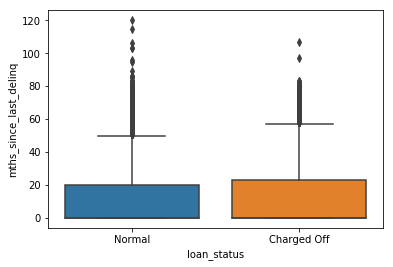

In [58]:
# mths_since_last_delinq is pretty close
sns.boxplot(x='loan_status',y='mths_since_last_delinq',data=loan_df)
plt.show()

In [59]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Normal,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Normal,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Normal,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Normal,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


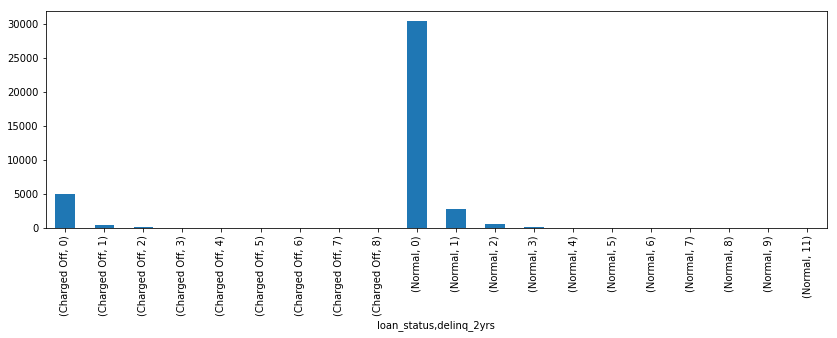

In [60]:
# delinq_2yrs might be a mrginally useful feature as customers no of delinquencies more than 8 are not 
#charged off as per our data 
loan_df.groupby('loan_status')['delinq_2yrs'].value_counts().plot(kind='bar',figsize=(14,4))
plt.show()

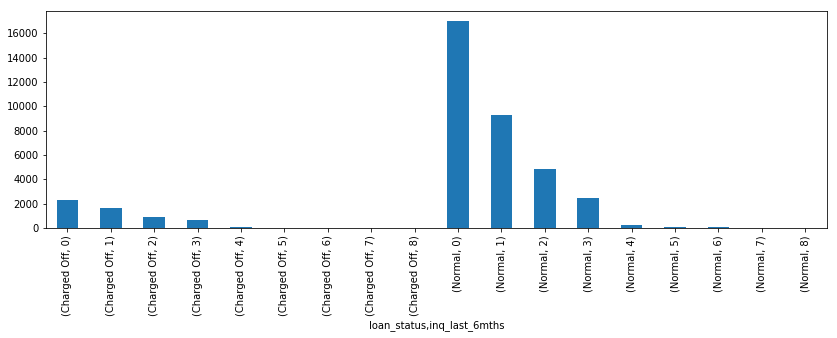

In [61]:
# delinq_2yrs might be a mrginally useful feature as customers no of delinquencies more than 8 are not 
#charged off as per our data 
loan_df.groupby('loan_status')['inq_last_6mths'].value_counts().plot(kind='bar',figsize=(14,4))
plt.show()

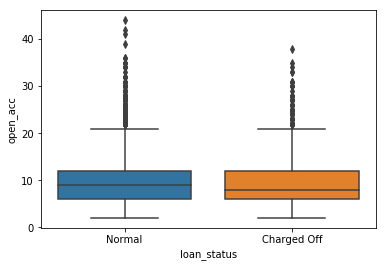

In [62]:
# open_acc is pretty close
sns.boxplot(x='loan_status',y='open_acc',data=loan_df)
plt.show()

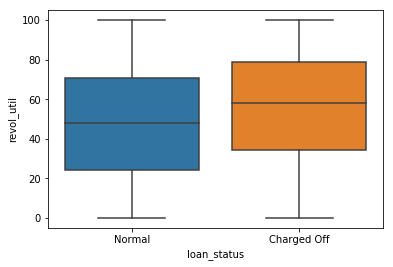

In [63]:
# revol_util is interesting
sns.boxplot(x='loan_status',y='revol_util',data=loan_df)
plt.show()

In [64]:
# have a closer look @ revol_util
# For charged-off loans , the mean and median dti are 1 point more than normal status annual_inc 
# so revol_util could be a marginally important feature
print('Mean revol_util',loan_df.groupby('loan_status')['revol_util'].mean())
print('*'*100)
print('median revol_util',loan_df.groupby('loan_status')['revol_util'].median())
print('*'*100)
print('max revol_util',loan_df.groupby('loan_status')['revol_util'].max())
print('*'*100)
print('min revol_util',loan_df.groupby('loan_status')['revol_util'].min())

Mean revol_util loan_status
Charged Off    55.414095
Normal         47.674094
Name: revol_util, dtype: float64
****************************************************************************************************
median revol_util loan_status
Charged Off    58.2
Normal         47.8
Name: revol_util, dtype: float64
****************************************************************************************************
max revol_util loan_status
Charged Off    99.9
Normal         99.9
Name: revol_util, dtype: float64
****************************************************************************************************
min revol_util loan_status
Charged Off    0.0
Normal         0.0
Name: revol_util, dtype: float64


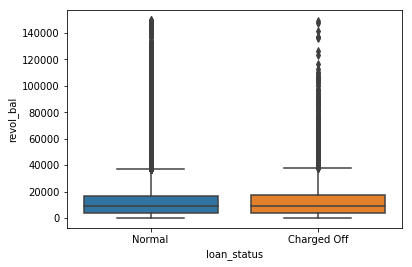

In [65]:
# revol_bal is close
sns.boxplot(x='loan_status',y='revol_bal',data=loan_df)
plt.show()

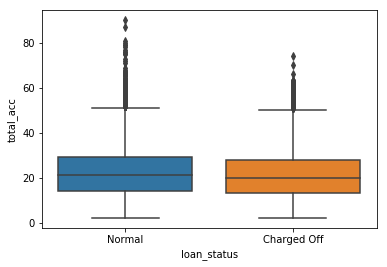

In [66]:
# total_acc 
sns.boxplot(x='loan_status',y='total_acc',data=loan_df)
plt.show()

In [67]:
# have a closer look @ total_acc
# For charged-off loans , the mean and median total_acc are less than normal status total_acc 
# so total_acc could be a marginally important feature
print('Mean total_acc',loan_df.groupby('loan_status')['total_acc'].mean())
print('*'*100)
print('median total_acc',loan_df.groupby('loan_status')['total_acc'].median())
print('*'*100)
print('max total_acc',loan_df.groupby('loan_status')['total_acc'].max())
print('*'*100)
print('min total_acc',loan_df.groupby('loan_status')['total_acc'].min())

Mean total_acc loan_status
Charged Off    21.427581
Normal         22.197976
Name: total_acc, dtype: float64
****************************************************************************************************
median total_acc loan_status
Charged Off    20
Normal         21
Name: total_acc, dtype: int64
****************************************************************************************************
max total_acc loan_status
Charged Off    74
Normal         90
Name: total_acc, dtype: int64
****************************************************************************************************
min total_acc loan_status
Charged Off    2
Normal         2
Name: total_acc, dtype: int64


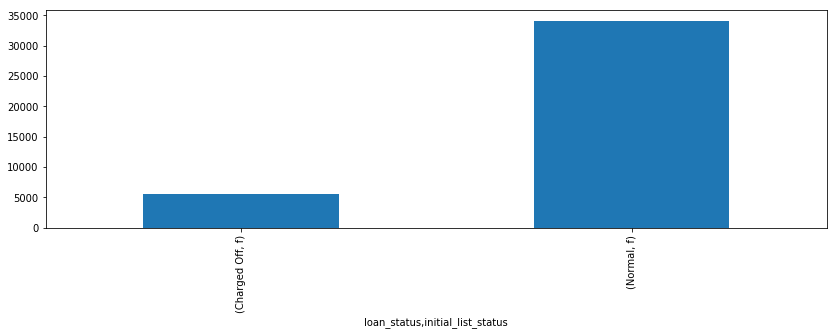

In [68]:
#initial_list_status not useful
loan_df.groupby('loan_status')['initial_list_status'].value_counts().plot(kind='bar',figsize=(14,4))
plt.show()

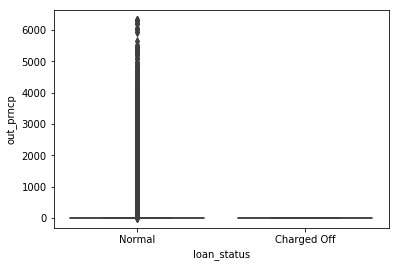

In [69]:
# out_prncp is 0 for charged_off loans.. hence not useful
sns.boxplot(x='loan_status',y='out_prncp',data=loan_df)
plt.show()

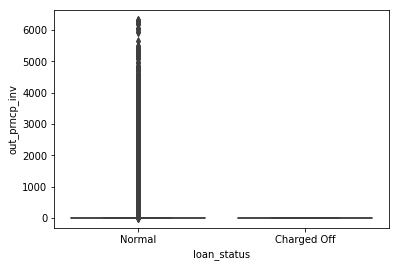

In [70]:
# out_prncp_inv is 0 for charged_off loans.. hence not useful
sns.boxplot(x='loan_status',y='out_prncp_inv',data=loan_df)
plt.show()

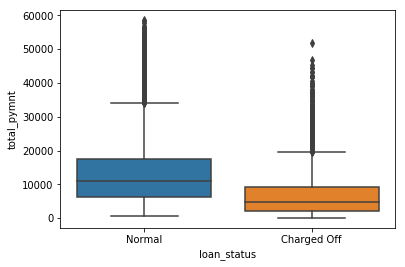

In [71]:
#total_pymnt
sns.boxplot(x='loan_status',y='total_pymnt',data=loan_df)
plt.show()

In [72]:
# have a closer look @ total_pymnt
# For charged-off loans , the mean and median total_pymnt are less than normal status total_pymnt 
# so total_pymnt could be a marginally important feature
print('Mean total_pymnt',loan_df.groupby('loan_status')['total_pymnt'].mean())
print('*'*100)
print('median total_pymnt',loan_df.groupby('loan_status')['total_pymnt'].median())
print('*'*100)
print('max total_pymnt',loan_df.groupby('loan_status')['total_pymnt'].max())
print('*'*100)
print('min total_pymnt',loan_df.groupby('loan_status')['total_pymnt'].min())

Mean total_pymnt loan_status
Charged Off     6838.030941
Normal         13031.000112
Name: total_pymnt, dtype: float64
****************************************************************************************************
median total_pymnt loan_status
Charged Off     4839.000000
Normal         10899.825495
Name: total_pymnt, dtype: float64
****************************************************************************************************
max total_pymnt loan_status
Charged Off    51745.45000
Normal         58563.67993
Name: total_pymnt, dtype: float64
****************************************************************************************************
min total_pymnt loan_status
Charged Off      0.000000
Normal         526.332241
Name: total_pymnt, dtype: float64


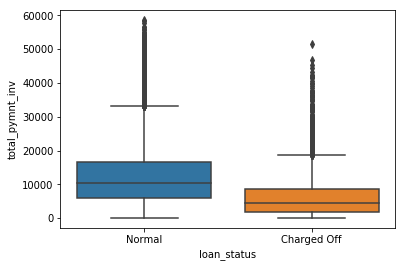

In [73]:
#total_pymnt_inv
sns.boxplot(x='loan_status',y='total_pymnt_inv',data=loan_df)
plt.show()

In [74]:
# have a closer look @ total_pymnt_inv
# For charged-off loans , the mean and median total_pymnt_inv are less than normal status total_pymnt_inv 
# so total_pymnt_inv could be a marginally important feature
print('Mean total_pymnt_inv',loan_df.groupby('loan_status')['total_pymnt_inv'].mean())
print('*'*100)
print('median total_pymnt_inv',loan_df.groupby('loan_status')['total_pymnt_inv'].median())
print('*'*100)
print('max total_pymnt_inv',loan_df.groupby('loan_status')['total_pymnt_inv'].max())
print('*'*100)
print('min total_pymnt_inv',loan_df.groupby('loan_status')['total_pymnt_inv'].min())

Mean total_pymnt_inv loan_status
Charged Off     6367.470474
Normal         12425.424029
Name: total_pymnt_inv, dtype: float64
****************************************************************************************************
median total_pymnt_inv loan_status
Charged Off     4345.740
Normal         10248.945
Name: total_pymnt_inv, dtype: float64
****************************************************************************************************
max total_pymnt_inv loan_status
Charged Off    51671.58
Normal         58563.68
Name: total_pymnt_inv, dtype: float64
****************************************************************************************************
min total_pymnt_inv loan_status
Charged Off    0.0
Normal         0.0
Name: total_pymnt_inv, dtype: float64


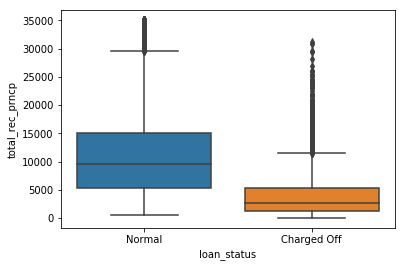

In [75]:
#total_rec_prncp
sns.boxplot(x='loan_status',y='total_rec_prncp',data=loan_df)
plt.show()

In [76]:
# have a closer look @ total_rec_prncp
# For charged-off loans , the mean and median total_rec_prncp are less than normal status total_rec_prncp 
# so total_rec_prncp could be a marginally important feature
print('Mean total_rec_prncp',loan_df.groupby('loan_status')['total_rec_prncp'].mean())
print('*'*100)
print('median total_rec_prncp',loan_df.groupby('loan_status')['total_rec_prncp'].median())
print('*'*100)
print('max total_rec_prncp',loan_df.groupby('loan_status')['total_rec_prncp'].max())
print('*'*100)
print('min total_rec_prncp',loan_df.groupby('loan_status')['total_rec_prncp'].min())

Mean total_rec_prncp loan_status
Charged Off     3967.177947
Normal         10755.034453
Name: total_rec_prncp, dtype: float64
****************************************************************************************************
median total_rec_prncp loan_status
Charged Off    2729.59
Normal         9600.00
Name: total_rec_prncp, dtype: float64
****************************************************************************************************
max total_rec_prncp loan_status
Charged Off    31115.81
Normal         35000.02
Name: total_rec_prncp, dtype: float64
****************************************************************************************************
min total_rec_prncp loan_status
Charged Off      0.0
Normal         500.0
Name: total_rec_prncp, dtype: float64


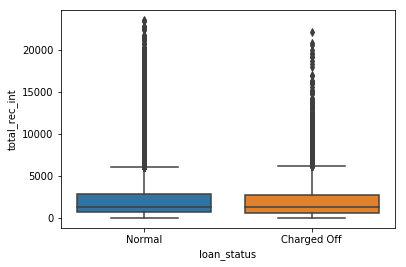

In [77]:
#total_rec_int
sns.boxplot(x='loan_status',y='total_rec_int',data=loan_df)
plt.show()

In [78]:
# have a closer look @ total_rec_int
# For charged-off loans , the mean and median total_rec_int are less than normal status total_rec_int 
# so total_rec_prncp could be a marginally important feature
print('Mean total_rec_int',loan_df.groupby('loan_status')['total_rec_int'].mean())
print('*'*100)
print('median total_rec_int',loan_df.groupby('loan_status')['total_rec_int'].median())
print('*'*100)
print('max total_rec_int',loan_df.groupby('loan_status')['total_rec_int'].max())
print('*'*100)
print('min total_rec_int',loan_df.groupby('loan_status')['total_rec_int'].min())

Mean total_rec_int loan_status
Charged Off    2194.459385
Normal         2275.086162
Name: total_rec_int, dtype: float64
****************************************************************************************************
median total_rec_int loan_status
Charged Off    1288.260
Normal         1358.555
Name: total_rec_int, dtype: float64
****************************************************************************************************
max total_rec_int loan_status
Charged Off    22122.30
Normal         23563.68
Name: total_rec_int, dtype: float64
****************************************************************************************************
min total_rec_int loan_status
Charged Off    0.00
Normal         6.22
Name: total_rec_int, dtype: float64


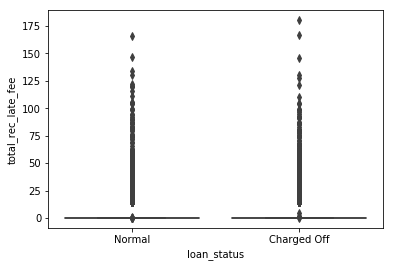

In [79]:
#total_rec_late_fee
sns.boxplot(x='loan_status',y='total_rec_late_fee',data=loan_df)
plt.show()

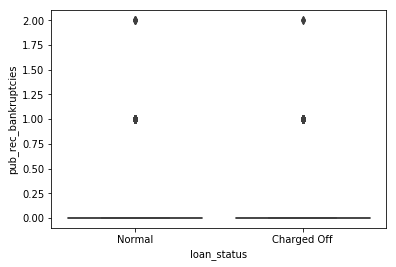

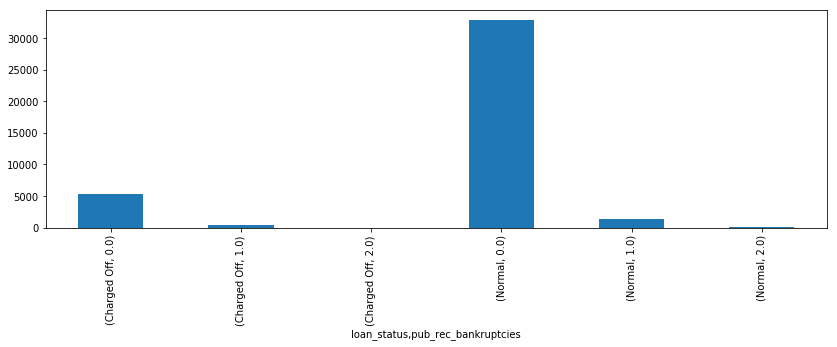

In [80]:
#pub_rec_bankruptcies
sns.boxplot(x='loan_status',y='pub_rec_bankruptcies',data=loan_df)
plt.show() 
loan_df.groupby('loan_status')['pub_rec_bankruptcies'].value_counts().plot(kind='bar',figsize=(14,4))
plt.show()

## As per Univariate analysis, below features could be helpful in predicting whether the loan could be charged off or not:-
<br/>

<li>1. int_rate</li>
<li>2. annual_inc</li>
<li>3. delinq_2yrs</li>
<li>4. dti</li>
<li>5. total_paymnt</li>
<li>6. total_rec_prncp</li>
<li>7. total_rec_int</li>

In [119]:
imp_features = loan_df[['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int','loan_status']]

In [120]:
imp_features.head()

,int_rate,annual_inc,delinq_2yrs,dti,total_pymnt,total_rec_prncp,total_rec_int,loan_status
0,10.65,24000.0,0,27.65,5863.155187,5000.00,863.16,Normal
1,15.27,30000.0,0,1.00,1008.710000,456.46,435.17,Charged Off
2,15.96,12252.0,0,8.72,3005.666844,2400.00,605.67,Normal
3,13.49,49200.0,0,20.00,12231.890000,10000.00,2214.92,Normal
4,12.69,80000.0,0,17.94,3513.330000,2475.94,1037.39,Normal


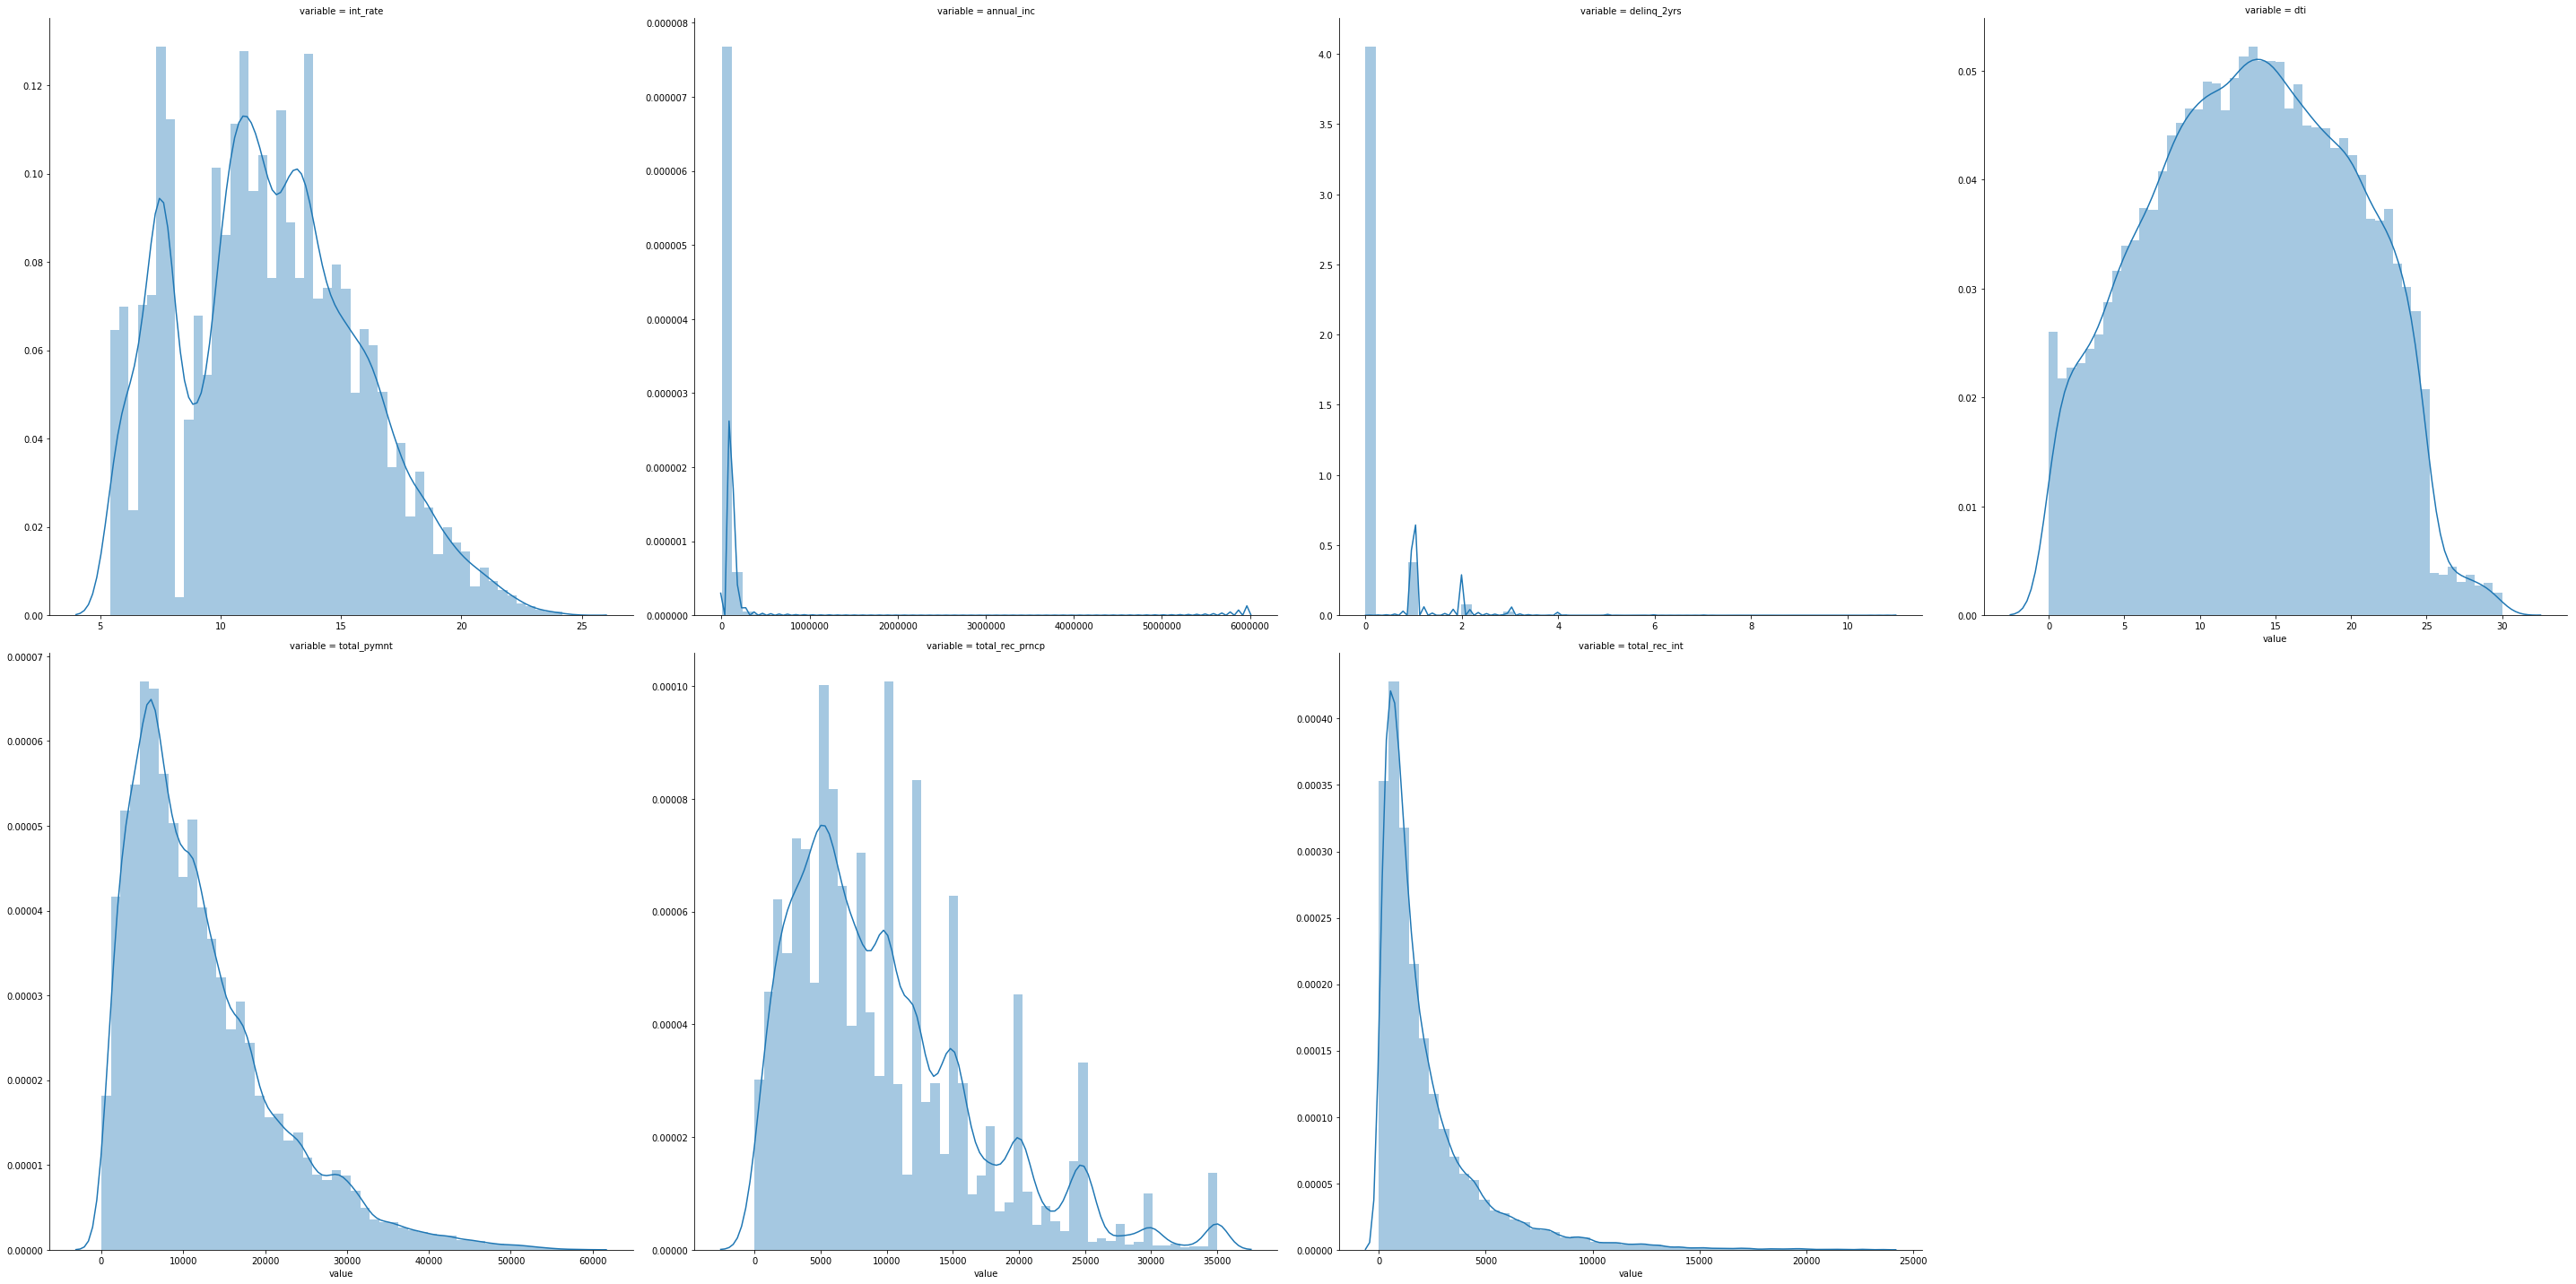

In [121]:
melted = pd.melt(imp_features,value_vars=['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int'])
f = sns.FacetGrid(melted,col='variable',sharex=False,sharey=False,col_wrap=4,size=10)
g = f.map(sns.distplot,'value')

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [192]:
X = imp_features[['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int']]
Y = imp_features['loan_status'] 
X.shape

(39717, 7)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
X_train.shape

(31773, 7)

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = LogisticRegression(penalty='l1').fit(X_train, y_train)

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [173]:
clf.score(X_test,y_test)
#clf.score(X_train,y_train)

0.956570996978852

### Using these features, 95.6 % accuracy was achieved.

#### Feature importance:-

In [160]:
df = pd.DataFrame({'feature':X.columns,'importance':clf.coef_[0].tolist()})

In [164]:
df = df.set_index('feature')

In [169]:
df.sort_values(by='importance',ascending=False)

,importance
feature,
total_rec_prncp,154.651509
total_rec_int,52.118545
int_rate,0.066044
delinq_2yrs,0.058255
annual_inc,-0.108745
dti,-0.170105
total_pymnt,-190.801086


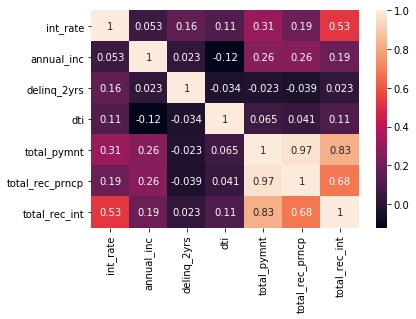

In [178]:
#correlation between variables
sns.heatmap(imp_features.corr(),annot=True)
plt.show()

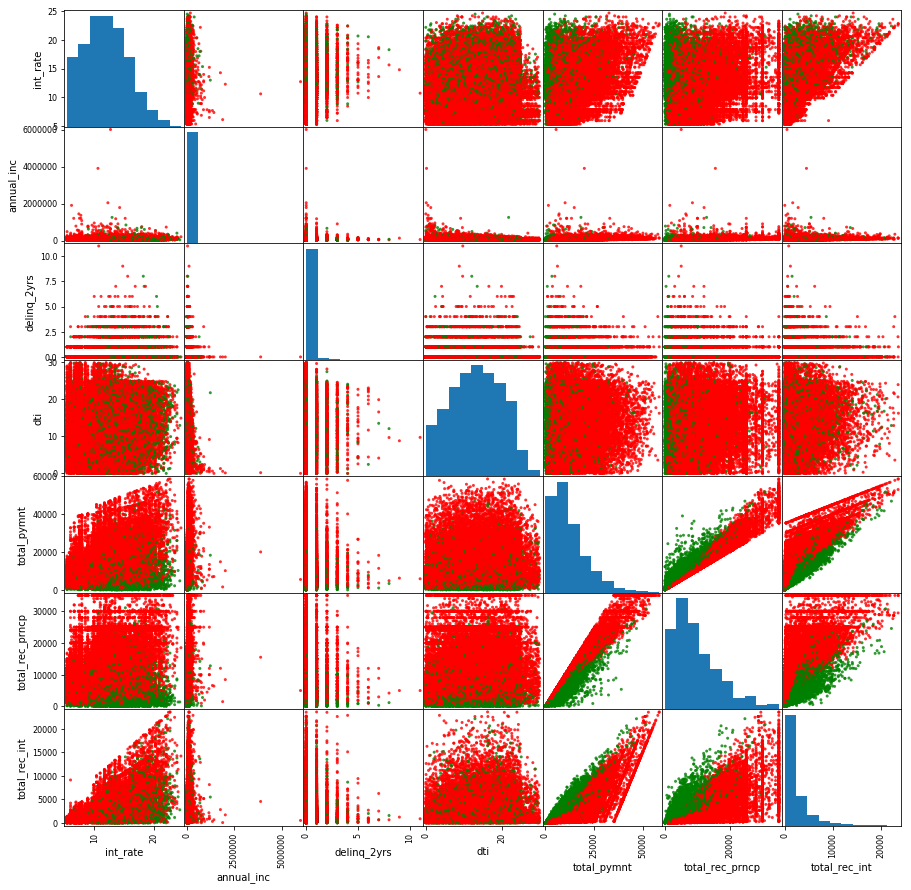

In [193]:
#scatter plot
g = pd.plotting.scatter_matrix(X, c=['red' if v == 'Normal' else 'green' for v in Y.values.tolist()], figsize=(15, 15), alpha=.8)

### From the scatter matrix, total_rec_prncp, total_rec_int and total_pymnt seem important to separate both classes

### Using a derived metric based on the data understanding:-

In [200]:
imp_features.head()

,int_rate,annual_inc,delinq_2yrs,dti,total_pymnt,total_rec_prncp,total_rec_int,loan_status
0,10.65,24000.0,0,27.65,5863.155187,5000.00,863.16,Normal
1,15.27,30000.0,0,1.00,1008.710000,456.46,435.17,Charged Off
2,15.96,12252.0,0,8.72,3005.666844,2400.00,605.67,Normal
3,13.49,49200.0,0,20.00,12231.890000,10000.00,2214.92,Normal
4,12.69,80000.0,0,17.94,3513.330000,2475.94,1037.39,Normal


In [201]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Normal,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,83.7,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,9.4,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Normal,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,98.5,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Normal,n,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Normal,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.9,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [210]:
imp_features['loan_amnt']=loan_df['loan_amnt']

#### Adding percentage of principal recovered as a derived new feature

In [212]:
imp_features['pct_rec_prncp']=imp_features['total_rec_prncp']*100/imp_features['loan_amnt']

In [213]:
imp_features.head()

,int_rate,annual_inc,delinq_2yrs,dti,total_pymnt,total_rec_prncp,total_rec_int,loan_status,loan_amnt,pct_rec_prncp
0,10.65,24000.0,0,27.65,5863.155187,5000.00,863.16,Normal,5000,100.000000
1,15.27,30000.0,0,1.00,1008.710000,456.46,435.17,Charged Off,2500,18.258400
2,15.96,12252.0,0,8.72,3005.666844,2400.00,605.67,Normal,2400,100.000000
3,13.49,49200.0,0,20.00,12231.890000,10000.00,2214.92,Normal,10000,100.000000
4,12.69,80000.0,0,17.94,3513.330000,2475.94,1037.39,Normal,3000,82.531333


In [221]:
X = imp_features[['int_rate','annual_inc','delinq_2yrs','dti','total_pymnt','total_rec_prncp','total_rec_int','loan_amnt','pct_rec_prncp']]
Y = imp_features['loan_status'] 
X.shape

(39717, 9)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
X_train.shape

(31773, 9)

In [223]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = LogisticRegression(penalty='l1').fit(X_train, y_train)

In [224]:
clf.score(X_test,y_test)
#clf.score(X_train,y_train)

0.9841389728096677

### Using the derived metric, the accuracy was increased to 98.14 % from earlier score of 95.6%
#### Feature importance:-

In [225]:
df = pd.DataFrame({'feature':X.columns,'importance':clf.coef_[0].tolist()})

In [226]:
df = df.set_index('feature')

In [227]:
df.sort_values(by='importance',ascending=False)

,importance
feature,
total_rec_prncp,84.919462
total_rec_int,30.762909
pct_rec_prncp,4.178043
loan_amnt,2.319264
annual_inc,0.172111
delinq_2yrs,0.021791
dti,-0.010544
int_rate,-0.133265
total_pymnt,-109.562003


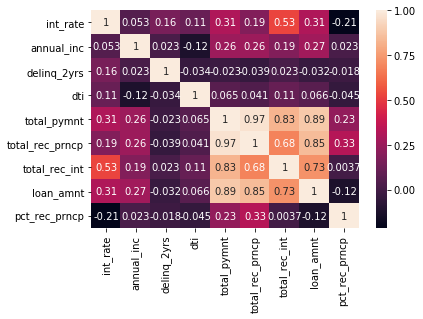

In [228]:
#correlation between variables
sns.heatmap(imp_features.corr(),annot=True)
plt.show()

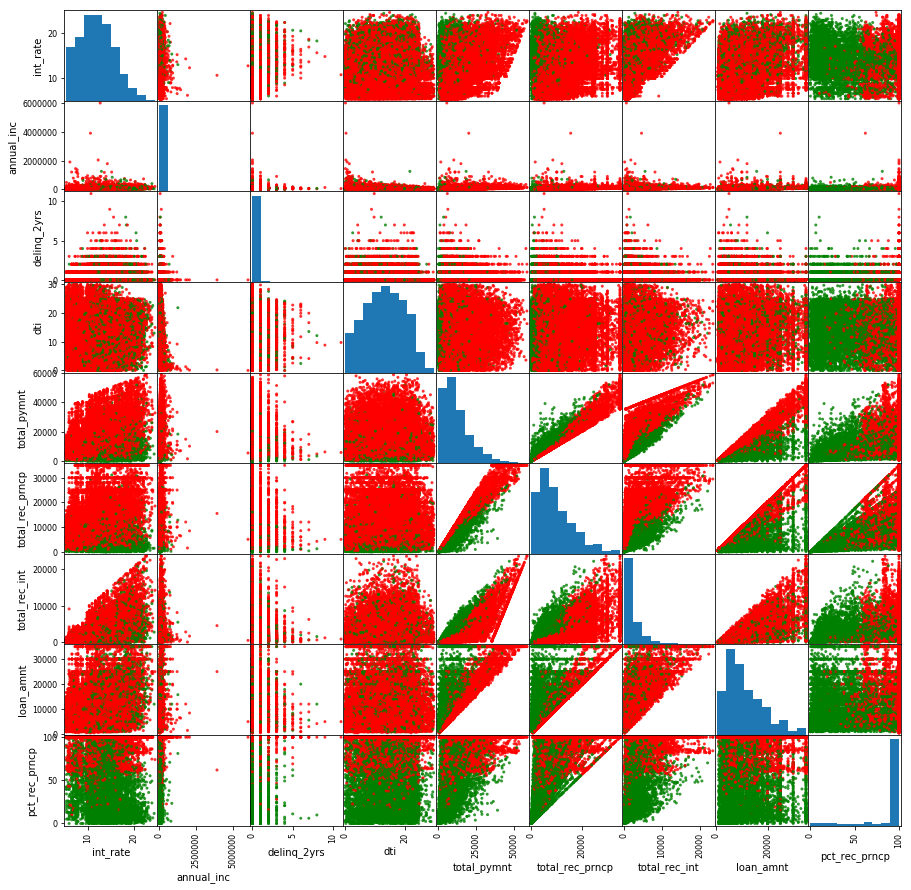

In [229]:
#scatter plot
g = pd.plotting.scatter_matrix(X, c=['red' if v == 'Normal' else 'green' for v in Y.values.tolist()], figsize=(15, 15), alpha=.8)

### As per the scatter plot, total_pymnt, total_rec_prncp, total_rec_int, loan_amnt and pct_rec_prncp seem useful in segregating the two classes